# PHASE 1 PROJECT

# AIRCRAFT RISK EVALUATION

# OVERVIEW

##### our company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprise  which will be a key step in our growth strategy. To align this expansion with our strategic goals, we will rely on data-driven insights to inform our decisions. A thorough risk assessment will be carried out using aviation accident data spanning from 1993 to 2023. The analysis aims to identify aircraft models with a lower likelihood of severe accidents or operational failures, determine locations that pose higher risks for aircraft operations, and assess the optimal number of engines required for stable and safe flights.

# BUSINESS UNDERSTANDING

##### Our company is expanding into the aviation industry, seeking to purchase and operate aircraft for both commercial and private enterprises. To ensure this venture is both safe and financially sustainable, we need to assess the risks associated with different aircraft models, operational environments, and structural designs. Specifically, the objectives of this analysis are to:

##### 1.Identify aircraft models with a lower likelihood of severe accidents or operational failures.

 ##### 2.Pinpoint locations that have historically proven risky for aircraft operations, highlighting potential geographic safety concerns.

##### 3.Determine the number of engines sufficient for ensuring the stability and safety of aircraft operations.

##### By achieving these objectives, we will be able to select aircraft models and operational strategies that align with the company’s goals of safety, reliability, and cost-effectiveness, minimizing potential risks as we enter this new industry.









# DATA PREPARATION:
##### 1.The data was cleaned using the VSCODE code editor. The python pandas library and numpy library was imported for analysis. In the data cleaning the data underwent several steps which include:

##### 2.Importing the relevant python libraries.
##### 3.Loading and reading the CSV file.
##### 4.Inspected the data to understand it by checking the information and the summary statistics
##### 4.Data Cleaning.
##### 5.Checked all the missing values,duplicates,erroneus values and dropped all the irrelevant columns with the missing values 
##### 6.Filled in all the numerical columns with missing values with 0 and all the categorical columns with missing values with unknown.
##### 7.Stripped all the white spaces.

## 1. Import Pandas and load the csv dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
#Load the Avaiation dataset
df = pd.read_csv('AviationData.csv',encoding = 'latin1',low_memory=False)
#Display the shape of the dataset 
df.shape
print(f'This data consists of {df.shape[0]} rows')
print(f'This data consists of {df.shape[1]} columns')


#Display the first few rows of the dataset
df.head()

This data consists of 88889 rows
This data consists of 31 columns


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## 2.Check the info and summary statistics of the dataset

In [3]:
#check for the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
#Check the summary statistics of the dataset
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## 4. Data Cleaning process

#### Investigate the Dataset for Duplicate, Extraneous and Missing values

In [5]:
# Check for duplicate values
df_Duplicates = df.duplicated().value_counts()
print(df_Duplicates)

# Check for the length of duplicate values
duplicates = df[df.duplicated()]
print('The number of duplicates are:',len(duplicates))
# duplicates.head()

False    88889
dtype: int64
The number of duplicates are: 0


##### There are no duplicate values as shown from the output above.

In [6]:
# Check for missing values in each column of the dataframe 
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

##### From the output above there are a number of columns that have many missing values and are not really relevant for our analysis. These columns that we would consider dropping are: Aircraft.Category, FAR.Description, Schedule, Air.carrier,Latitude, Longitude, Airport.Code, Airport.Name.
 

In [7]:
df.drop(['Aircraft.Category', 'Registration.Number','FAR.Description', 'Schedule', 'Air.carrier', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name'], 
		axis=1, inplace=True)

In [8]:
#Check again to now see the remaining columns and figure out how to deal with the relevant columns with missing values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: int64

### Handling the missing values


##### We create a copy of the dataframe before replacing the missing values for the original data to remain unchanged. This would also allow us to refer back to the original data if needed and also prevents accidental modifications of important information

In [9]:
 df_clean = df.copy()

##### We check the data types of the columns to know what data type we are going to use to fill in the missing values.

In [10]:
df_clean.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Injury.Severity            object
Aircraft.damage            object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status              object
Publication.Date           object
dtype: object

In [11]:
#check for the remaining numerical columns 
numerical_columns = df_clean.select_dtypes(include=['number']).columns
print(numerical_columns)

Index(['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured'],
      dtype='object')


##### In the cell below we are filling in the continous columns that have missing values with 0 .The Number.of.Engines column is filled in  with the mean since it wouldn't be logical to give an aircraft zero engine. All functional aircrafts have atleast one engine.

In [30]:
# Replacing the Number.of.Engines column with the mean
df_clean['Number.of.Engines'].fillna(df['Number.of.Engines'].mean(), inplace=True)
# Replacing Null values in numerical columns with 0
numerical_colums= [ 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured']
for col in numerical_columns:
    df_clean[col] = df_clean[col].fillna(0)  # Replacing Null values with 0
    


##### In the cell below we are filling in  the categorical columns with missing values with the string 'unknown' 

In [31]:
#First  check for the categorical columns.
categorical_columns = df_clean.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Location',
       'Country', 'Injury.Severity', 'Aircraft.damage', 'Make', 'Model',
       'Amateur.Built', 'Engine.Type', 'Purpose.of.flight',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [32]:
#Filling the Null values in the categorical columns with the value 'Unknown'
categorical_columns = ['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage', 'Make',
       'Model', 'Amateur.Built', 'Engine.Type', 'Purpose.of.flight',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date']
for col in categorical_columns:
    df_clean[col] = df_clean[col].fillna('Unknown')  
    

In [49]:
df_clean.isna().sum()


Event_Id                  0
Investigation_Type        0
Accident_Number           0
Event_Date                0
Location                  0
Country                   0
Injury_Severity           0
Aircraft_damage           0
Make                      0
Model                     0
Amateur_Built             0
Number_of_Engines         0
Engine_Type               0
Purpose_of_flight         0
Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Weather_Condition         0
Broad_phase_of_flight     0
Report_Status             0
Publication_Date          0
dtype: int64

In [50]:
df_clean.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Make,Model,...,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Unknown
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,...,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,...,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980


In [16]:
#Check for extraneous/erronous values
for col in df_clean.columns:
    print(col, '\n', df[col].value_counts().head(), '\n\n')

Event.Id 
 20001212X19172    3
20001214X45071    3
20050601X00691    2
20001213X32738    2
20001214X44918    2
Name: Event.Id, dtype: int64 


Investigation.Type 
 Accident    85015
Incident     3874
Name: Investigation.Type, dtype: int64 


Accident.Number 
 DCA22WA167    2
DCA22WA089    2
DCA22LA201    2
DCA22WA214    2
CEN23MA034    2
Name: Accident.Number, dtype: int64 


Event.Date 
 1984-06-30    25
2000-07-08    25
1982-05-16    25
1983-08-05    24
1983-06-05    24
Name: Event.Date, dtype: int64 


Location 
 ANCHORAGE, AK      434
MIAMI, FL          200
ALBUQUERQUE, NM    196
HOUSTON, TX        193
CHICAGO, IL        184
Name: Location, dtype: int64 


Country 
 United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
Name: Country, dtype: int64 


Injury.Severity 
 Non-Fatal    67357
Fatal(1)      6167
Fatal         5262
Fatal(2)      3711
Incident      2219
Name: Injury.Severity, dtype: int64 


Aircraft.damage 
 

In [17]:
#format Event.Date column 
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'], format='%Y-%m-%d')


##### We will strip any whitespaces in the columns

In [18]:
# We  use the str.strip function  to strip the leading and trailing spaces on the columns
df_clean.columns = df_clean.columns.str.strip()

In [19]:
df_clean.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,...,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,...,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980


In [35]:
df_clean.columns = df_clean.columns.str.replace('.', '_', regex=False)

# Display the updated column names
print(df_clean.columns)

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Injury_Severity', 'Aircraft_damage', 'Make',
       'Model', 'Amateur_Built', 'Number_of_Engines', 'Engine_Type',
       'Purpose_of_flight', 'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_phase_of_flight', 'Report_Status', 'Publication_Date'],
      dtype='object')


##### We now save the cleaned dataset as a CSV file

In [36]:
df_clean.to_csv('Aviation_cleaned.csv',index = False)

## 5. Exploratory Data Analysis

#####  In this section we are using visualizations to address the objectives we listed earlier. 

In [37]:
# We now load the cleaned dataset for visualizations
df1 = pd.read_csv('Aviation_cleaned.csv',low_memory=False)
df1.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Make,Model,...,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Unknown
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,...,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,...,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980


##### We will first do a graphical representation in a pie chart of the Investigation.Type column to be able to know the relative percentages of the two possibilities(Accident and Incident)

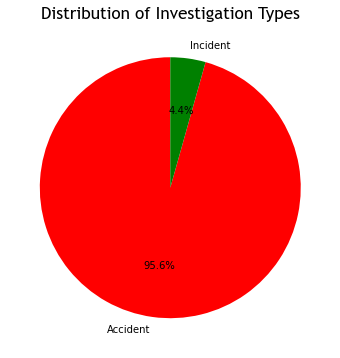

In [39]:

investigation_type_counts = df1['Investigation_Type'].value_counts()
# Create the pie chart
plt.figure(figsize=(6, 6),facecolor='white')
plt.pie(investigation_type_counts, 
        labels=investigation_type_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=['r', 'g'])

# Equal aspect ratio ensures that pie is drawn as a circle
#plt.axis('equal')

# Title for the chart
plt.title('Distribution of Investigation Types',fontname='Trebuchet Ms',fontsize=17)

# Show the pie chart
plt.show()


##### From the graphical representation above we can see that the accidents takes 95.6% of the investigation done while the incidences take 4.4% of the investigation done.

#### Objective 1:Identify aircraft models and makes with a lower likelihood of  accidents 

#####  This visualization will involve categorizing the number of accidents per make and per model.We will thereby have two visualizations to address the objective

In [40]:
#This line filters the df1 DataFrame to include only rows where the Investigation.Type column has the value 'Accident'.
Accidents = df1[df1['Investigation_Type'] == 'Accident']
Make_Accidents = Accidents.groupby('Make').size().sort_values(ascending=False)
Model_Accidents = Accidents.groupby('Model').size().sort_values(ascending=False)
# We now print the top 15 Aircrafts with the most accident occurences both the model and the make
print(f'The top 15 Aircraft Makes with the most accident occurences:\n{Make_Accidents.head(15)}\n\n\n')
print(f'Top 15 Aircraft Models with the most accident occurences:\n{Model_Accidents.head(15)}\n\n\n')

The top 15 Aircraft Makes with the most accident occurences:
Make
Cessna         21973
Piper          11885
CESSNA          4820
Beech           4170
PIPER           2799
Bell            2093
Grumman         1080
Mooney          1074
BEECH           1007
Robinson         943
Boeing           916
Bellanca         883
Hughes           790
Schweizer        627
Air Tractor      593
dtype: int64



Top 15 Aircraft Models with the most accident occurences:
Model
152          2349
172          1747
172N         1161
PA-28-140     929
150           822
172M          793
172P          685
182           653
180           621
150M          583
PA-18         581
PA-18-150     578
PA-28-180     571
PA-28-161     565
PA-28-181     528
dtype: int64





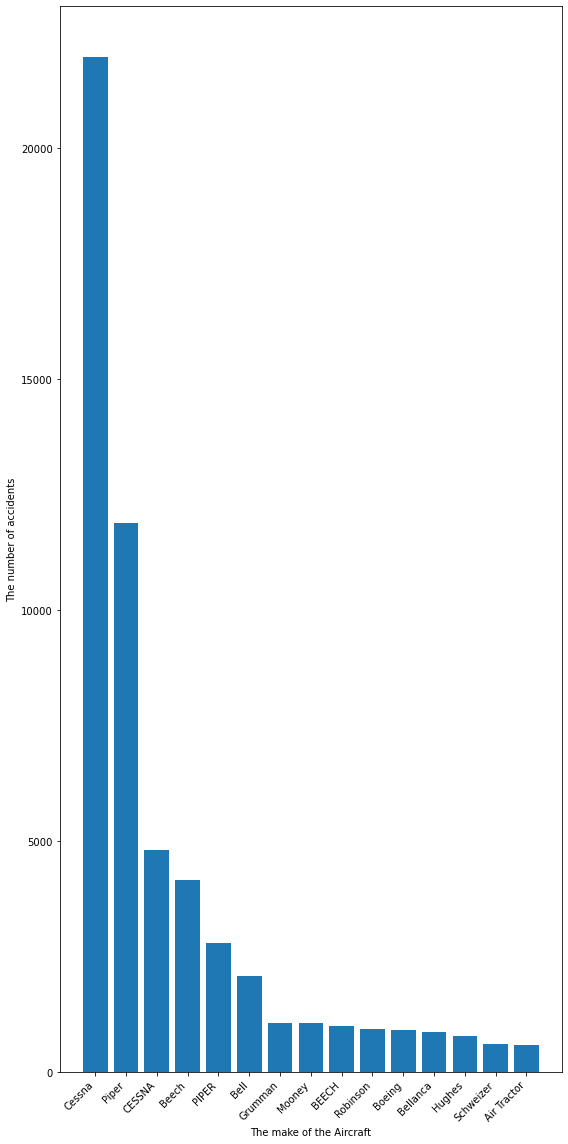

In [41]:
fig, ax = plt.subplots(figsize=(8, 16))

# Use Make_Accidents for x-axis and its values for height
x = Make_Accidents.head(15).index  # Extract the labels (Make names)
height = Make_Accidents.head(15).values  # Extract the corresponding values (number of accidents)

ax.bar(x, height)
ax.set_xlabel('The make of the Aircraft')  # Fixed method name
ax.set_ylabel('The number of accidents')  # Fixed method name

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

##### From the figure plotted above it can be clearly see that cessna and piper make aircrafts have the highest incidences of accidents.

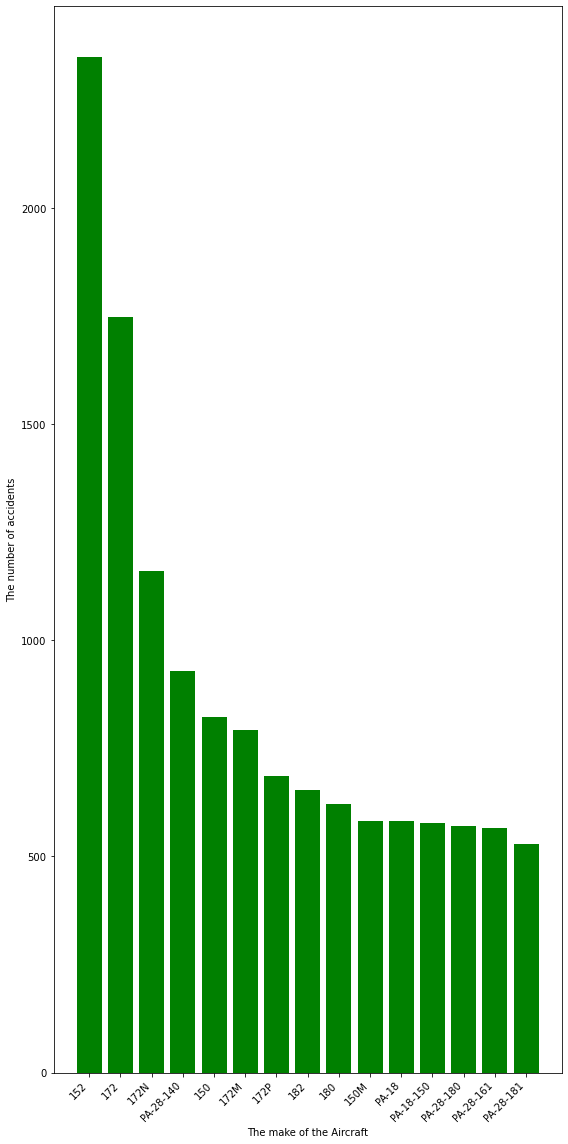

In [42]:
fig, ax = plt.subplots(figsize=(8, 16))

# Use Make_Accidents for x-axis and its values for height
x = Model_Accidents.head(15).index  # Extract the labels (Make names)
height = Model_Accidents.head(15).values  # Extract the corresponding values (number of accidents)

ax.bar(x, height,color='green',)
ax.set_xlabel('The make of the Aircraft')  # Fixed method name
ax.set_ylabel('The number of accidents')  # Fixed method name

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

##### From the figure plotted above it can be clearly see that 152 and 172 model aircrafts have incredibly high  incidences of accidents.

##### Objective 2: Pinpoint locations that have historically proven risky for aircraft operations, highlighting potential geographic safety concerns.


In [43]:
# Analysing  the number of accidents per location using the groupby function 
Accidents_location = df1.groupby('Location').size().sort_values(ascending=False).head(10)
Accidents_location

Location
ANCHORAGE, AK      434
MIAMI, FL          200
ALBUQUERQUE, NM    196
HOUSTON, TX        193
CHICAGO, IL        184
FAIRBANKS, AK      174
TUCSON, AZ         142
ORLANDO, FL        132
PHOENIX, AZ        132
ENGLEWOOD, CO      131
dtype: int64

##### From the above output we are shown the top ten locations risky for aircraft operations

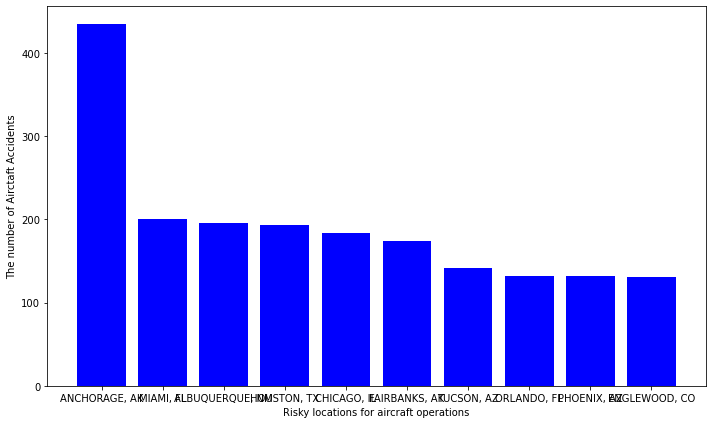

In [44]:
fig, ax = plt.subplots(figsize = (10, 6))
x = Accidents_location.index
heights = Accidents_location.values

bar_title ='Locations with the highest number of aircraft Accidents'
bar_count_label = 'The number of Airctaft Accidents'
bar_series_label = 'Risky locations for aircraft operations'

ax.bar(x, heights,color = 'b')
ax.set_xlabel(bar_series_label)
ax.set_ylabel(bar_count_label,)
plt.tight_layout()
plt.show()

##### Objective 3: Determine the number of engines sufficient for ensuring the stability and safety of aircraft operations.

In [45]:
# Analysis of number of accidents by number of engines Number.of.Engines,  Engine.Type
Engine_Accidents = pd.pivot_table(df1,index='Number_of_Engines',values=['Investigation_Type'],aggfunc=np.size).reset_index()
Engine_Accidents

,Number_of_Engines,Investigation_Type
0,0.000000,1226
1,1.000000,69582
2,1.146585,6084
3,2.000000,11079
4,3.000000,483
5,4.000000,431
6,6.000000,1
7,8.000000,3


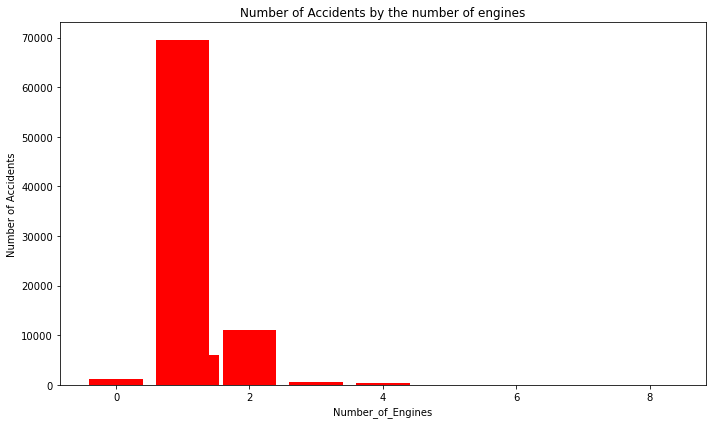

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
x = Engine_Accidents['Number_of_Engines']
y = Engine_Accidents['Investigation_Type']
ax.bar(x, y, color='r')  # Use 'y' for the height of the bars
ax.set_xlabel('Number_of_Engines')  # Call set_xlabel as a function
ax.set_ylabel('Number of Accidents')  # Call set_ylabel as a function
ax.set_title('Number of Accidents by the number of engines')
plt.tight_layout()

##### The Aircrafts with more than 4 engines have lesser occurrences of accidents meaning those aircrafts with less than four engines have a greater probability of accidents.

## Conclusions

##### From the graphical representation above we can see that the accidents takes 95.6% of the investigation done while the incidences take 4.4% of the investigation done.
##### We can conclude that the model with the most accident occurences is the 152 and 172.For the make we have the Cessna leading with the highest number of accidents followed bt the Piper. 

##### We can see that the locations that  aircrafts are at a risk of accidents are Anchorage, Miami and Houston .

##### We can see that the aircrafts with more than 4 engines have lesser occurrences of accidents. This would also mean that the aircrafts with less than four engines have a greater probability of accidents. 

## Recommendations
##### Aircraft Makes and models
##### -Avoid aircraft makes and models that have high accident rates, including brands like Cessna and Piper.
##### Location
##### -Locations with a high risk of accidents should be avoided.This can help airlines to ensure the stability and safety of their aircraft operations.
##### Number of engines.
##### -Opt for aircraft with more than four engines to minimize the risk of accidents.